In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Medals

In [3]:
#reading the medals xlsx file
medals = pd.read_excel(r'Medals.xlsx',header=0)

In [4]:
medals_data = medals.copy()
medals_data = medals_data[(medals.Rank < 11)]
medals_data = medals_data.sort_values('Rank by Total')
medals_data = medals_data.drop(['Rank','Total','Rank by Total'], axis = 1)
medals_data 

,Team/NOC,Gold,Silver,Bronze
0,United States of America,39,41,33
1,People's Republic of China,38,32,18
4,ROC,20,28,23
3,Great Britain,22,21,22
2,Japan,27,14,17
5,Australia,17,7,22
9,Italy,10,10,20
8,Germany,10,11,16
6,Netherlands,10,12,14
7,France,10,12,11


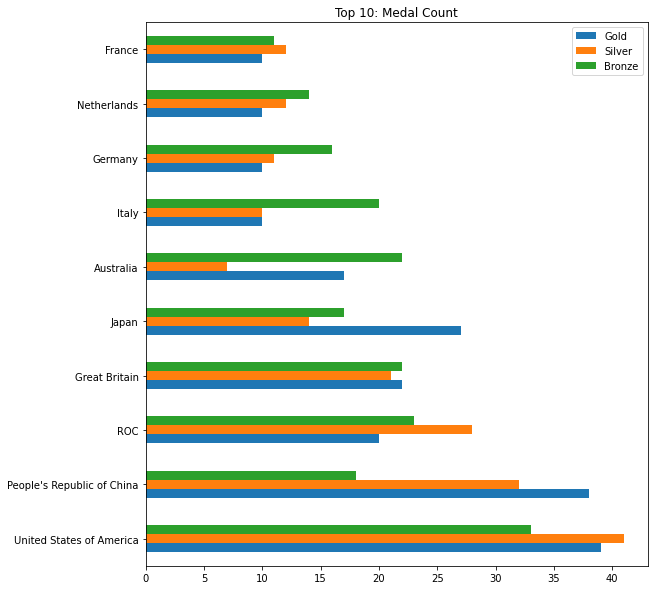

In [5]:
medals_data.set_index(['Team/NOC'])[['Gold', 'Silver', 'Bronze']].stack().unstack().plot.barh(figsize=(9,10))
plt.ylabel('')
plt.title('Top 10: Medal Count')
#plt.show()
plt.savefig('Top_10_Medal_Count.png', dpi = 560)

# Gender Entries

In [6]:
#reading the gender xlsx file
entries_gender = pd.read_excel(r'EntriesGender.xlsx',header=0)

In [7]:
entries_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


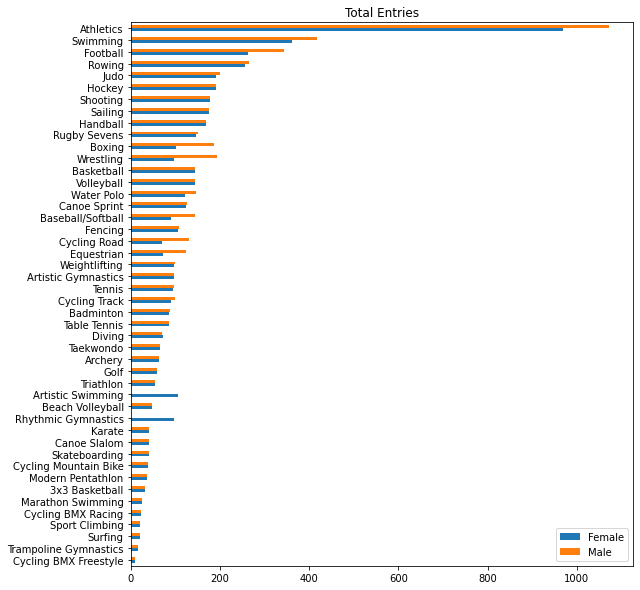

In [8]:
gender_datas = entries_gender[['Discipline','Female','Male','Total']].copy()
gender_datas = gender_datas.sort_values('Total')
#plot
gender_datas.set_index(['Discipline'])[['Female','Male']].stack().unstack().plot.barh(figsize=(9,10))
plt.ylabel('')
plt.title('Total Entries')
#plt.show()
plt.savefig('entriesGender.png', dpi = 560)

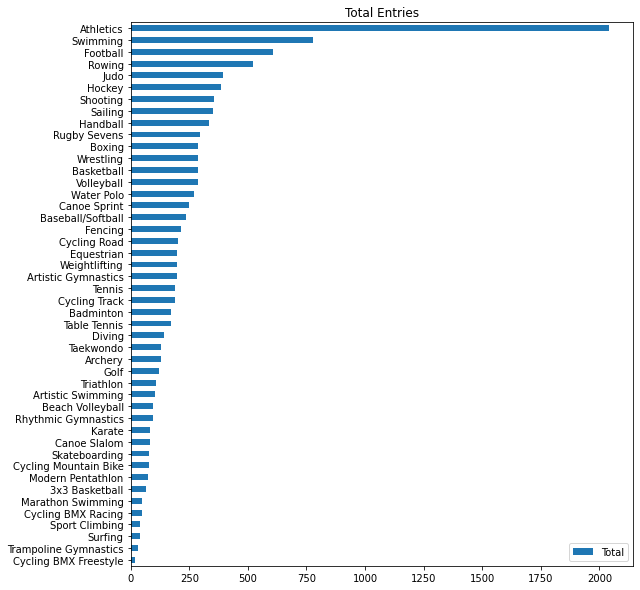

In [9]:
gender_datas = entries_gender[['Discipline','Total']].copy()
#plot
gender_datas = gender_datas.sort_values('Total')
gender_datas.set_index(['Discipline'])[['Total']].stack().unstack().plot.barh(figsize=(9,10))
plt.ylabel('')
plt.title('Total Entries')
#plt.show()
plt.savefig('entriesTotalCount.png', dpi = 560)

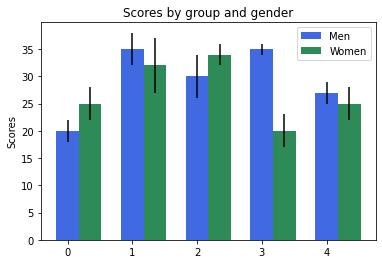

In [10]:
#From StackOverflow
N = 5
menMeans = (20,35,30,35,27)
menStd = (2,3,4,1,2)
#
ind = np.arange(N)
width = 0.35
#
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='royalblue',yerr=menStd)

womenMeans = (25,32,34,20,25)
womenStd = (3,5,2,3,3)
#
rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen',yerr=womenStd)
#
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')

ax.legend((rects1[0], rects2[0]),('Men','Women'))
plt.show()